# 人工知能 csc.t272
## プロジェクト課題
### MNIST dataset をもちいた文字生成

In [4]:
# パッケージのインポート
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
# model の作成
# MNIST dataset; [28, 28]
class MNIST_NN(nn.Module):
    def __init__(
            self,
            layer_dim=256,
    ):
        super().__init__()
        self.layer1 = nn.Linear(784, layer_dim)
        self.layer2 = nn.Linear(layer_dim, layer_dim)
        self.layer3 = nn.Linear(layer_dim, 10)
        self.act = nn.ReLU()

    def forward(self, input):
        x = input.view(input.size(0), -1) 
        x = self.layer1(x)
        x = self.act(x)
        x = self.layer2(x)
        x = self.act(x)
        x = self.layer3(x)
        return x

In [ ]:
# main
## model やdataset の定義
model = MNIST_NN()

bs = 64
lr = 0.002
epochs = 5

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)

train_data = torchvision.datasets.MNIST(root="~/AI/data/train", train=True, download=True, transform=transforms.ToTensor())
test_data = torchvision.datasets.MNIST(root="~/AI/data/test", train=False, download=True, transform=transforms.ToTensor())

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=bs)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=bs)

## training

for epoch in range(epochs):
    model.train()

    total_loss = 0
    train_bar = tqdm(
        enumerate(train_dataloader),
        total=len(train_dataloader),
        desc=f"epoch: {epoch+1} / {epochs}"
    )

    for batch, (img, lbl) in train_bar:
        optimizer.zero_grad()
        pred = model(img)
        loss = criterion(pred, lbl)
        loss.backward()
        total_loss += loss.item()
        optimizer.step()
        train_bar.set_postfix(loss=f"{loss.item():.4f}")
    
    model.eval()
    with torch.no_grad():
        eval_bar = tqdm(
            enumerate(test_dataloader),
            total=len(test_dataloader),
            desc=f"epoch: {epoch+1} / {epochs}"
        )

        for batch, (img, lbl) in eval_bar:
            pred = model(img)
            loss = criterion(pred, lbl)
            eval_bar.set_postfix(loss=f"{loss:.4f}")

epoch: 1 / 5:   0%|          | 0/938 [00:00<?, ?it/s]


NameError: name 'loss' is not defined

In [8]:
from train import training, evaluation
acc = evaluation(
    model=model,
    dataloader=test_dataloader,
    load=True
)
print(f"accuracy: {acc}")

AttributeError: 'collections.OrderedDict' object has no attribute 'eval'

In [1]:
# main.py @06/23
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm

from model import MNIST_NN
from train import training, evaluation

if __name__ == "__main__":
    # hyper parameters
    bs = 64
    lr = 0.002
    epochs = 5

    # dataset
    train_data = torchvision.datasets.MNIST(root="/home/lethe/AI/data/train", train=True, transform=transforms.ToTensor())
    test_data = torchvision.datasets.MNIST(root="/home/lethe/AI/data/test", train=False, transform=transforms.ToTensor())
    train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=bs)
    test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=bs)

    # model
    model = MNIST_NN()
    
    # train
    """
    training(
        model=model,
        dataloader=train_dataloader,
        lr=lr,
        epochs=epochs,
        save=True
    )
    """
    acc = evaluation(
        model=model,
        dataloader=test_dataloader,
        load=True
    )
    print(f"accuracy: {acc}")

evaluating: 100%|██████████| 157/157 [00:01<00:00, 150.03it/s]

accuracy: 97.8


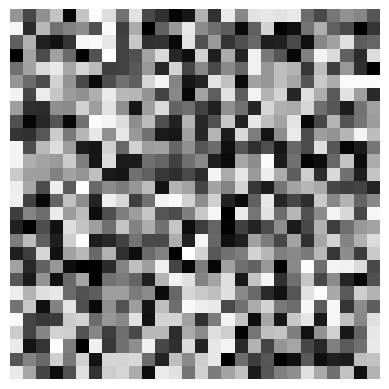

tensor([[ -0.3905,  -9.2070,  -1.3290,   0.4764, -16.7787,   4.2293,  -3.2679,
          -5.0778,  -1.9082, -11.2124]], grad_fn=<AddmmBackward0>)


100%|██████████| 10000/10000 [00:09<00:00, 1040.04it/s]


tensor([[-17.2369,  -7.6242,   1.6770,  15.0829, -23.5632,   1.1575, -27.6214,
          -7.8078,  -3.9516, -12.5507]], grad_fn=<AddmmBackward0>)


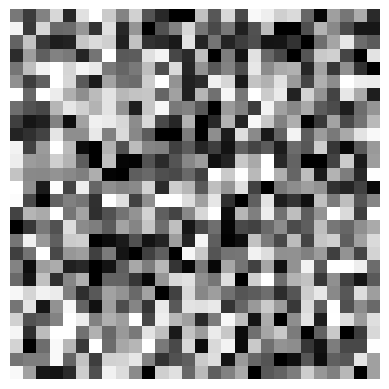

In [13]:
# generations
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
import matplotlib.pyplot as plt

from model import MNIST_NN

target = int(input("input number: "))
label = torch.tensor([target])
img_tensor = torch.rand(1, 784, requires_grad=True)
lr = 0.001
nums = 10000

img = img_tensor.detach().view(28, 28)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


optimizer = torch.optim.Adam([img_tensor], lr=lr)
criterion = nn.CrossEntropyLoss()

model = MNIST_NN()
ckpt = torch.load("/home/lethe/AI/data/model.pt")
model.load_state_dict(ckpt["model"])
model.eval()

pred = model(img_tensor)
print(pred)

for i in tqdm(range(nums)):
    optimizer.zero_grad()
    output = model(img_tensor)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

pred = model(img_tensor)
print(pred)

img = img_tensor.detach().view(28, 28)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


